In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/IPyNb')
print(os.getcwd())

C:\Users\Cheng\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [6]:
df = pd.read_csv("../Java/Output/FFTVar_spec.txt", sep='\t')
df.head()

,RealType,NoiseType,Noise,Signal,Order,Freq,Test,I/O,Measure,Part,...,246,247,248,249,250,251,252,253,254,255
0,Var,Gaussian,0.0,Sin,4,1,Forward,input,Value,Real,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Var,Gaussian,0.0,Sin,4,1,Forward,input,Error,Real,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Var,Gaussian,0.0,Sin,4,1,Forward,input,Uncertainty,Real,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Var,Gaussian,0.0,Sin,4,1,Forward,input,Normalized,Real,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Var,Gaussian,0.0,Sin,4,1,Forward,input,Value,Imag,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['RealType', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'I/O', 'Measure', 'Part',
       ...
       '246', '247', '248', '249', '250', '251', '252', '253', '254', '255'],
      dtype='object', length=266)

In [ ]:
def PlotSpec(noiseType, noise, signal, order, freq, test, 
             io='output', sMeasure=['Uncertainty', 'Error'], sPart=['Real', 'Imag'],
             sStyle=['r-', 'b+', 'c-', 'gx']):
    df['legend'] = df['Measure'] + ": " + df['Part']
    sIdx = [str(i) for i in range(1 << order)]
    if noise == 0:
        title = f'{signal} {freq}/2^{order} with no noise: {test} {io}'
    else:
        title = f'{signal} {freq}/2^{order} with {noise} noise: {test} {io}'
    dfSpec =  df[(df['NoiseType']==noiseType) & (df['Noise']==noise) & (df['Signal']==signal) & 
                 (df['Order']==order) & (df['Freq']==freq) & (df['Test']==test) & 
                 (df['I/O']==io) & (df['Measure'].isin(sMeasure)) & (df['Part'].isin(sPart))]\
                 .set_index('legend')
    ax = dfSpec[sIdx].T.plot(title=title, style=sStyle)
    if ((test == 'Forward') and (io == 'output')) or ((test == 'Reverse') and (io == 'input')):
        ax.set_xlabel('Frequence')
    else:
        ax.set_xlabel('Wave')
    
    ax.set_ylabel('Complex Value')
    ax.legend(bbox_to_anchor=(1.05, 1.0))

# Validation

# Sin vs Cos

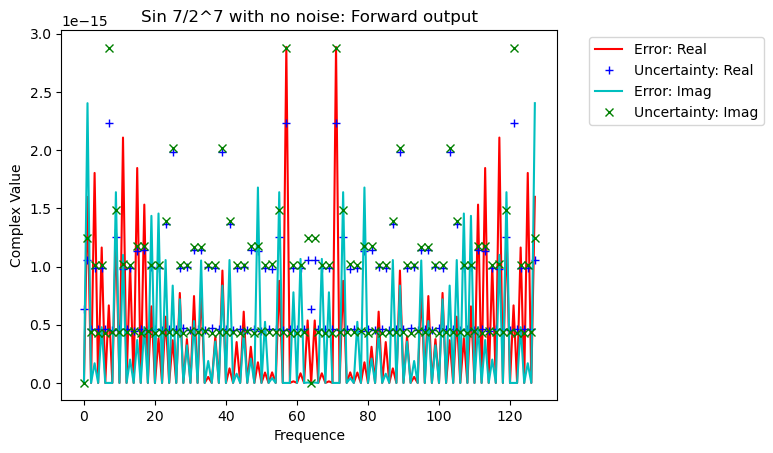

In [78]:
PlotSpec('Gaussian', 0, 'Sin', 7, 7, 'Forward')

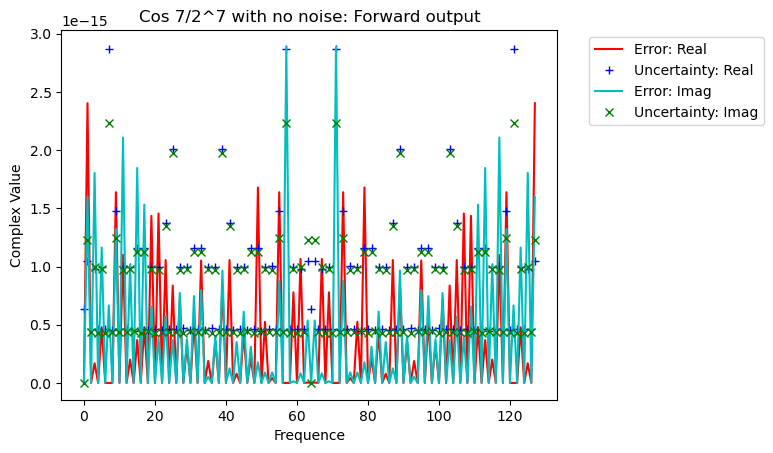

In [79]:
PlotSpec('Gaussian', 0, 'Cos', 7, 7, 'Forward')

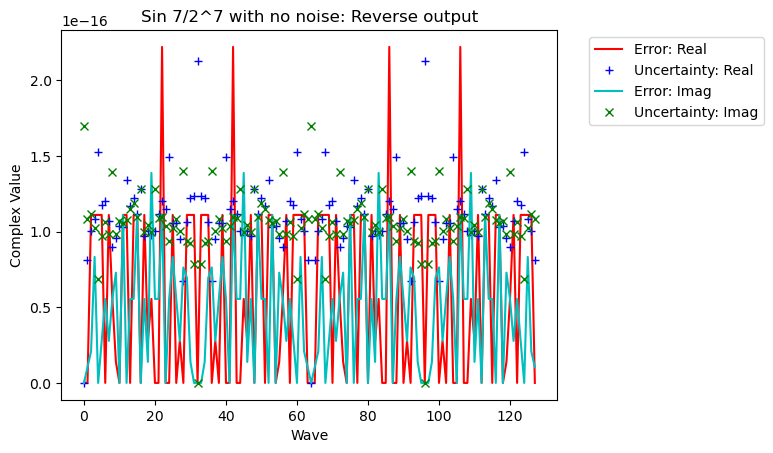

In [80]:
PlotSpec('Gaussian', 0, 'Sin', 7, 7, 'Reverse')

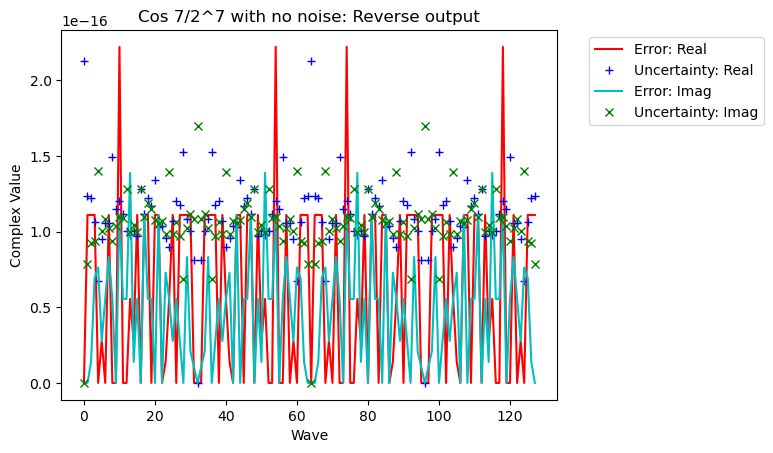

In [81]:
PlotSpec('Gaussian', 0, 'Cos', 7, 7, 'Reverse')

## Sin with Noise

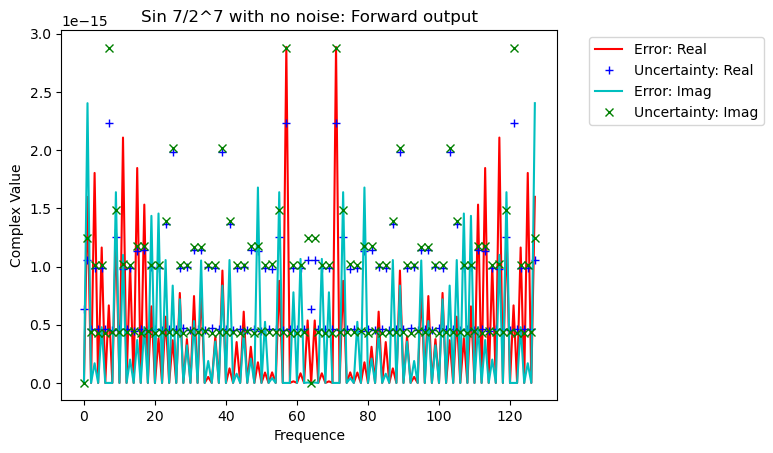

In [84]:
PlotSpec('Gaussian', 0, 'Sin', 7, 7, 'Forward')

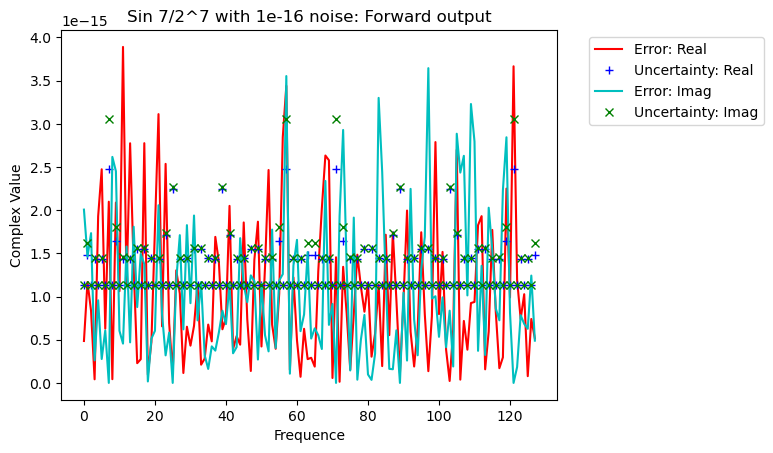

In [82]:
PlotSpec('Gaussian', 1e-16, 'Sin', 7, 7, 'Forward')

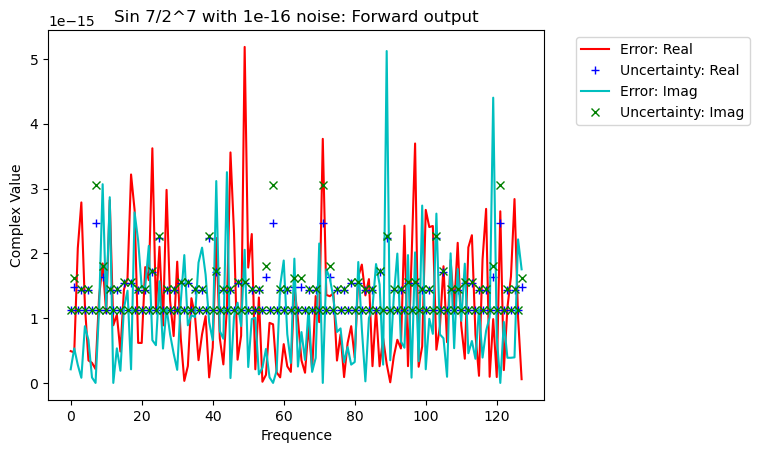

In [86]:
PlotSpec('White', 1e-16, 'Sin', 7, 7, 'Forward')

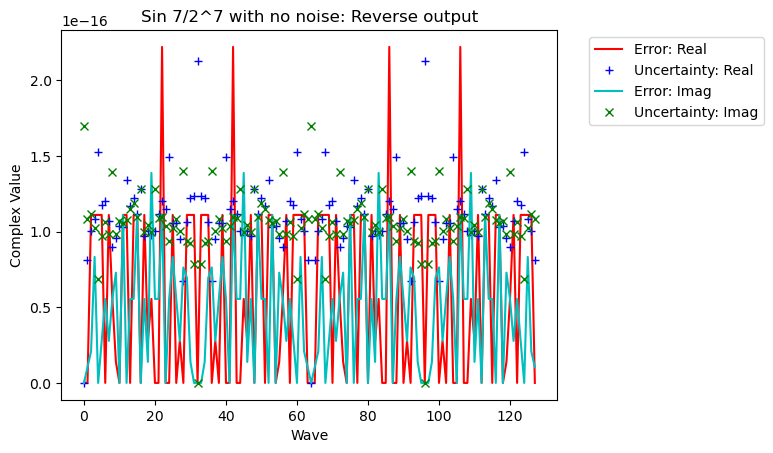

In [85]:
PlotSpec('Gaussian', 0, 'Sin', 7, 7, 'Reverse')

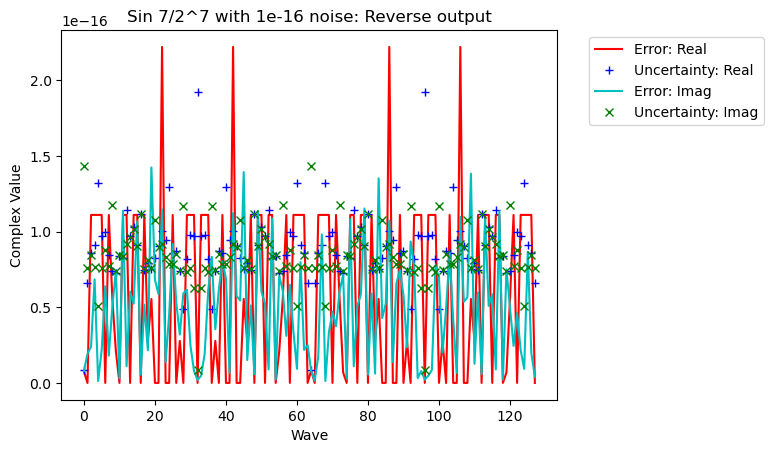

In [83]:
PlotSpec('Gaussian', 1e-16, 'Sin', 7, 7, 'Reverse')

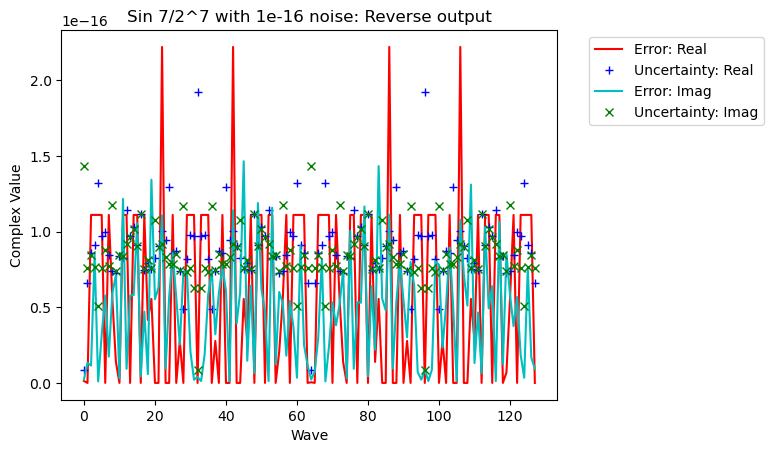

In [87]:
PlotSpec('White', 1e-16, 'Sin', 7, 7, 'Reverse')

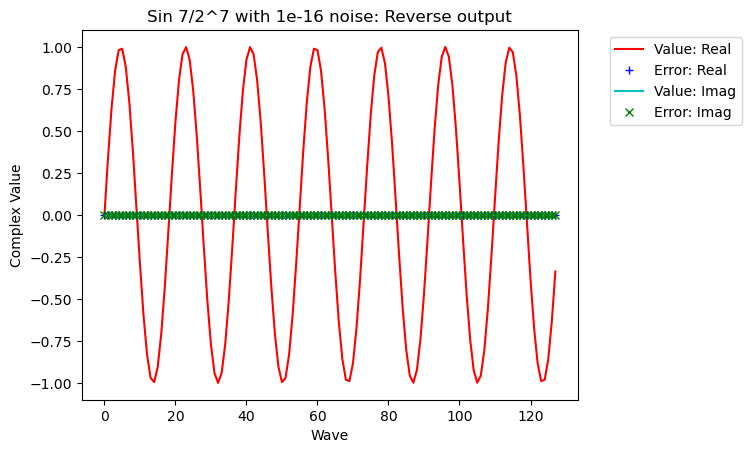

In [94]:
PlotSpec('White', 1e-16, 'Sin', 7, 7, 'Reverse', sMeasure=['Value', 'Error'])

## Sin with different order

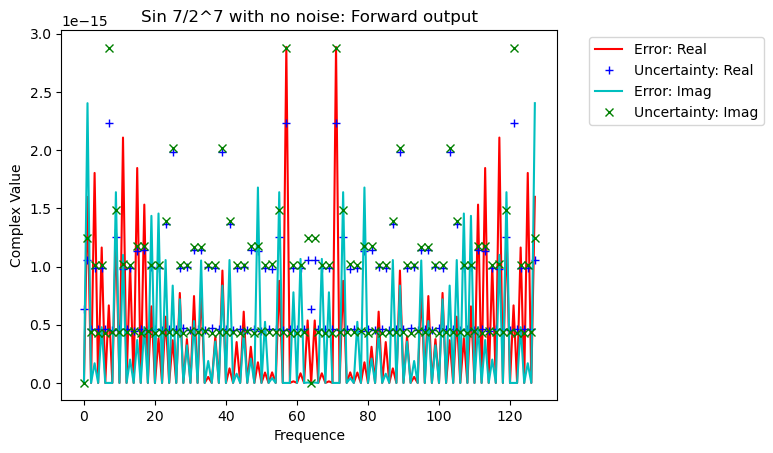

In [75]:
PlotSpec('Gaussian', 0, 'Sin', 7, 7, 'Forward')

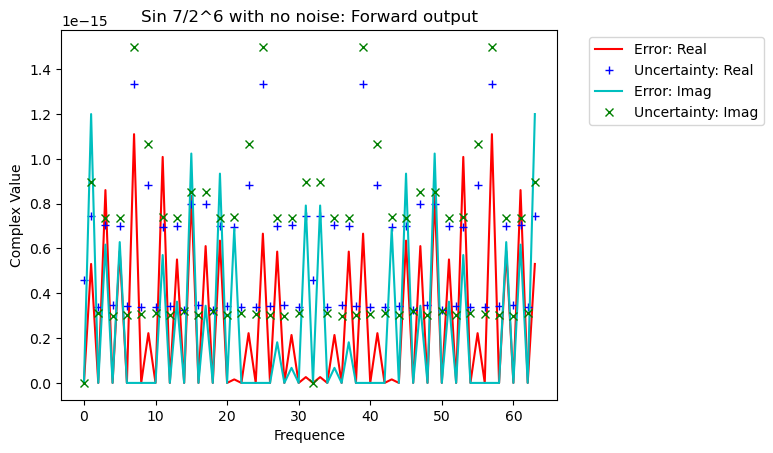

In [76]:
PlotSpec('Gaussian', 0, 'Sin', 6, 7, 'Forward')

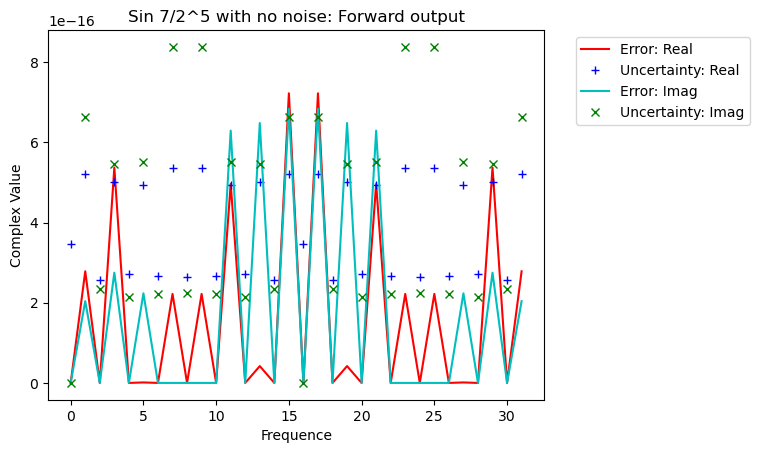

In [77]:
PlotSpec('Gaussian', 0, 'Sin', 5, 7, 'Forward')

# Forward

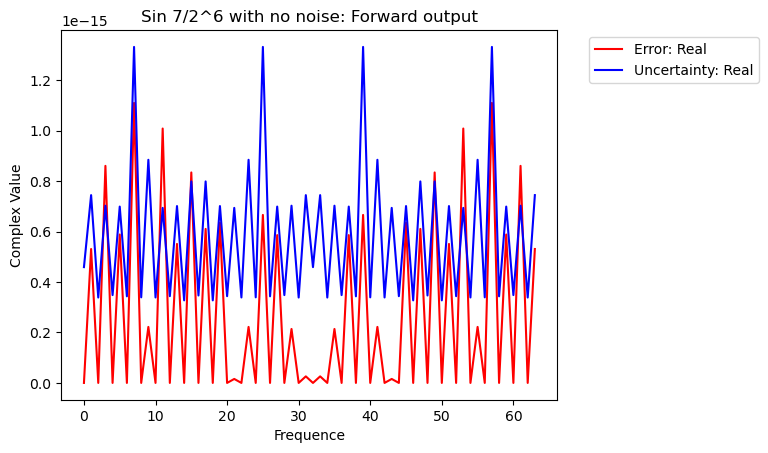

In [89]:
PlotSpec('Gaussian', 0, 'Sin', 6, 7, 'Forward', sPart=['Real'], sStyle=['r-', 'b-'])

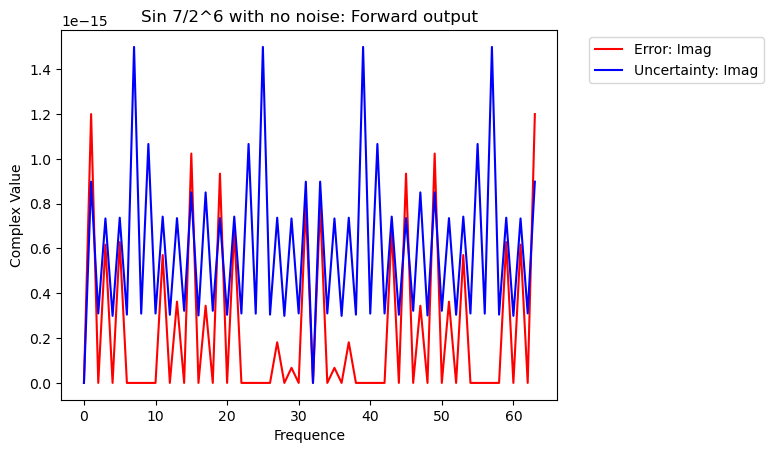

In [43]:
PlotSpec('Gaussian', 0, 'Sin', 6, 7, 'Forward', sPart=['Imag'], sStyle=['r-', 'b-'])

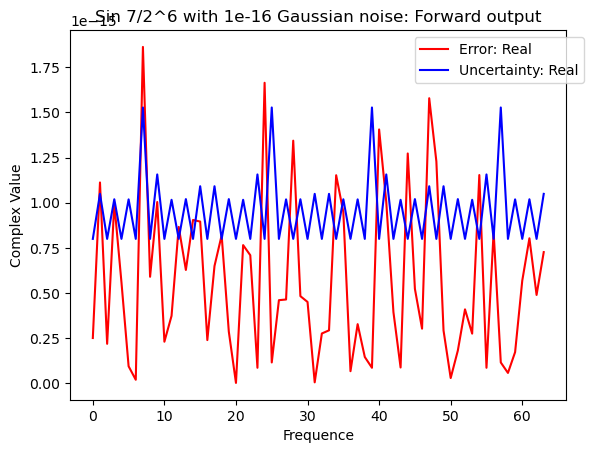

In [44]:
PlotSpec('Gaussian', 1e-16, 'Sin', 6, 7, 'Forward', sPart=['Real'], sStyle=['r-', 'b-'])

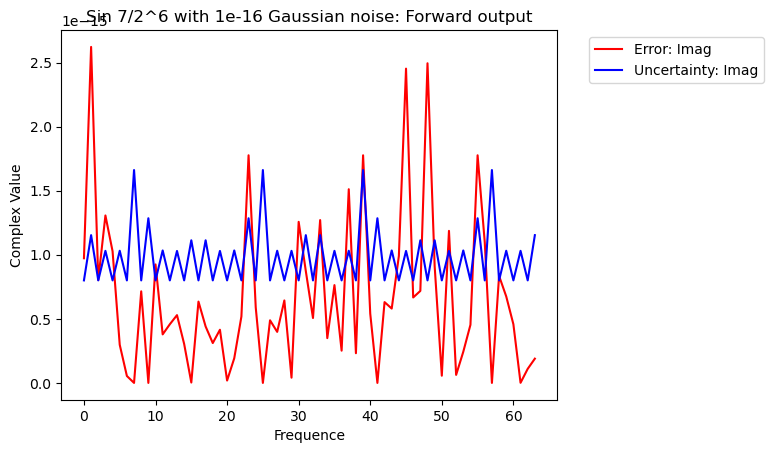

In [45]:
PlotSpec('Gaussian', 1e-16, 'Sin', 6, 7, 'Forward', sPart=['Imag'], sStyle=['r-', 'b-'])

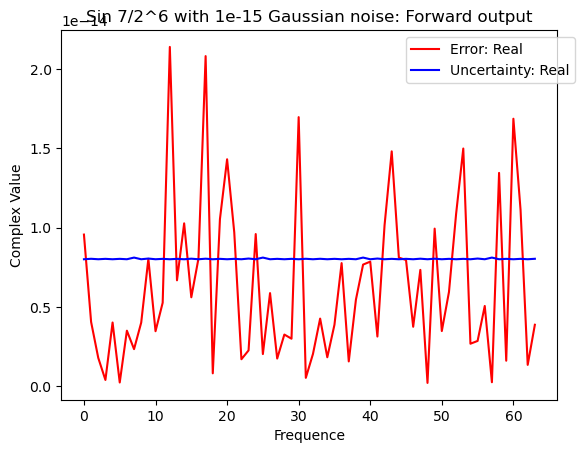

In [46]:
PlotSpec('Gaussian', 1e-15, 'Sin', 6, 7, 'Forward', sPart=['Real'], sStyle=['r-', 'b-'])

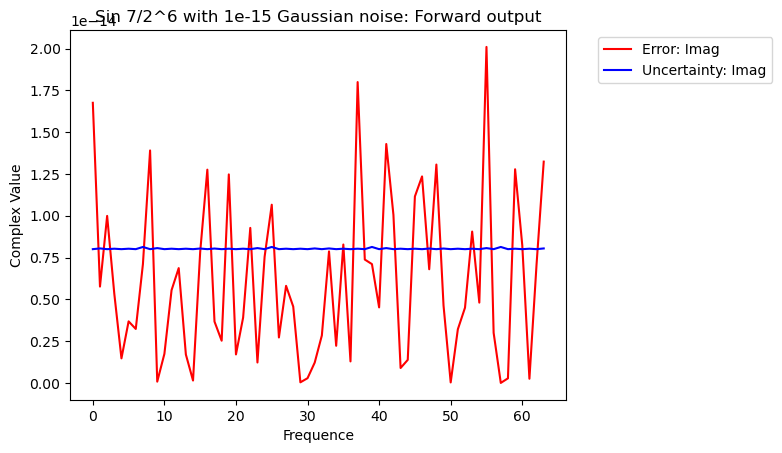

In [47]:
PlotSpec('Gaussian', 1e-15, 'Sin', 6, 7, 'Forward', sPart=['Imag'], sStyle=['r-', 'b-'])

# Reverse

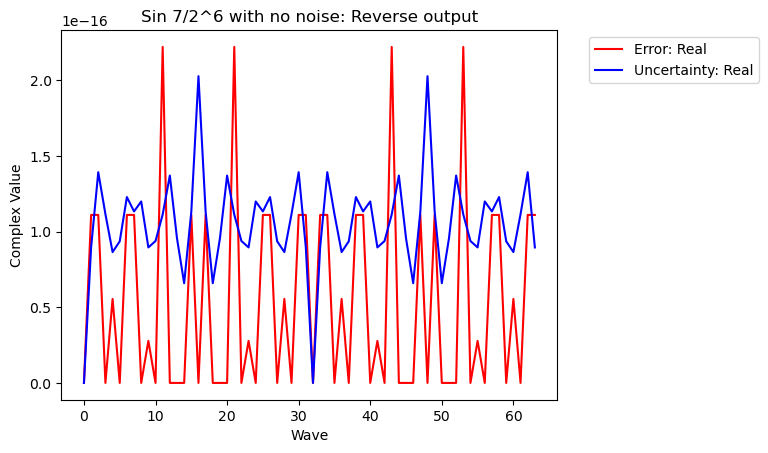

In [48]:
PlotSpec('Gaussian', 0, 'Sin', 6, 7, 'Reverse', sPart=['Real'], sStyle=['r-', 'b-'])

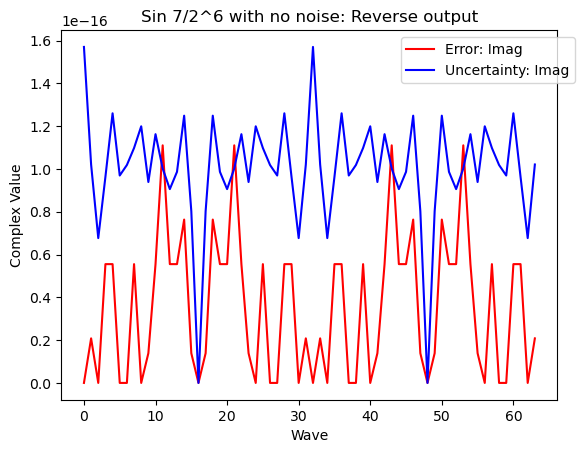

In [50]:
PlotSpec('Gaussian', 0, 'Sin', 6, 7, 'Reverse', sPart=['Imag'], sStyle=['r-', 'b-'])

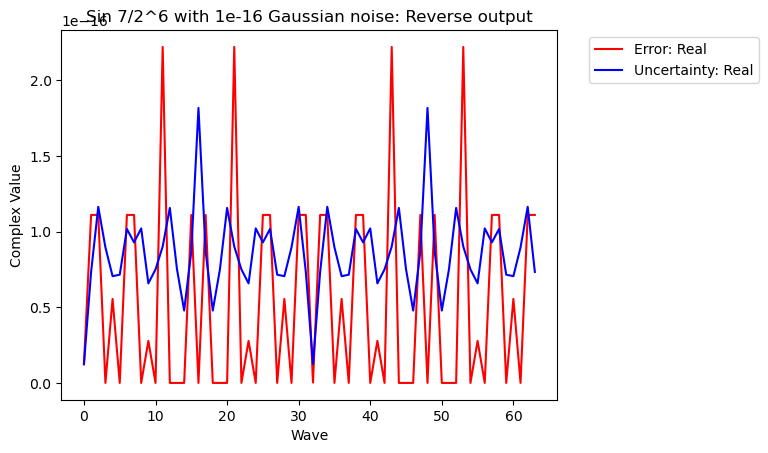

In [51]:
PlotSpec('Gaussian', 1e-16, 'Sin', 6, 7, 'Reverse', sPart=['Real'], sStyle=['r-', 'b-'])

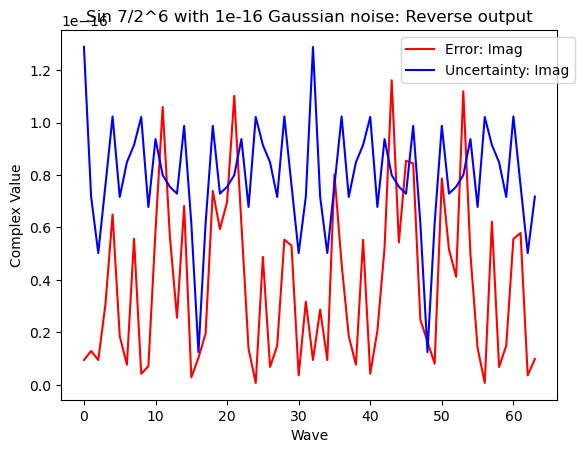

In [52]:
PlotSpec('Gaussian', 1e-16, 'Sin', 6, 7, 'Reverse', sPart=['Imag'], sStyle=['r-', 'b-'])

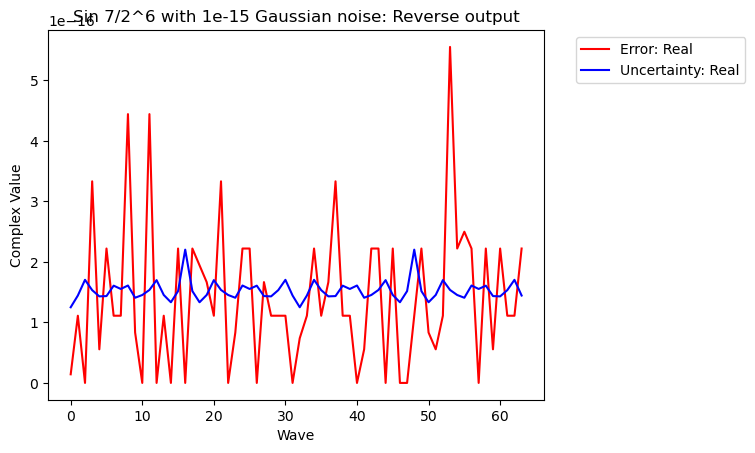

In [53]:
PlotSpec('Gaussian', 1e-15, 'Sin', 6, 7, 'Reverse', sPart=['Real'], sStyle=['r-', 'b-'])

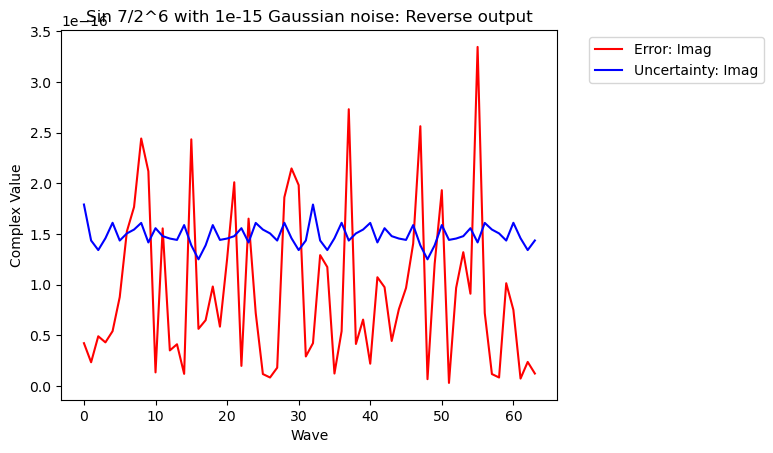

In [54]:
PlotSpec('Gaussian', 1e-15, 'Sin', 6, 7, 'Reverse', sPart=['Imag'], sStyle=['r-', 'b-'])

# Linear

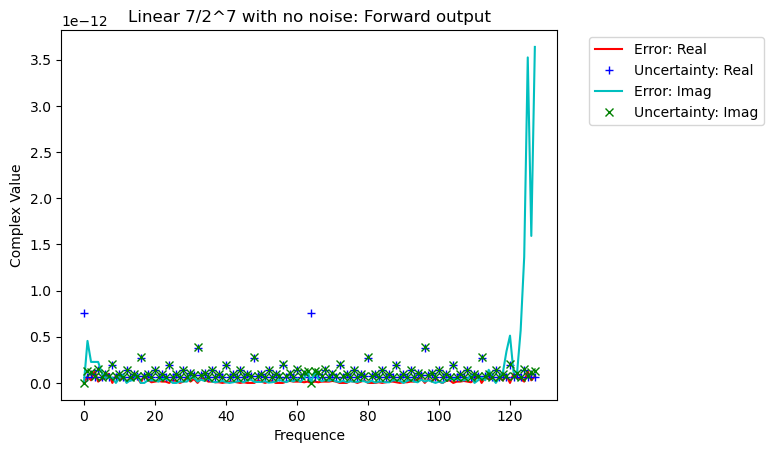

In [90]:
PlotSpec('Gaussian', 0, 'Linear', 7, 7, 'Forward')

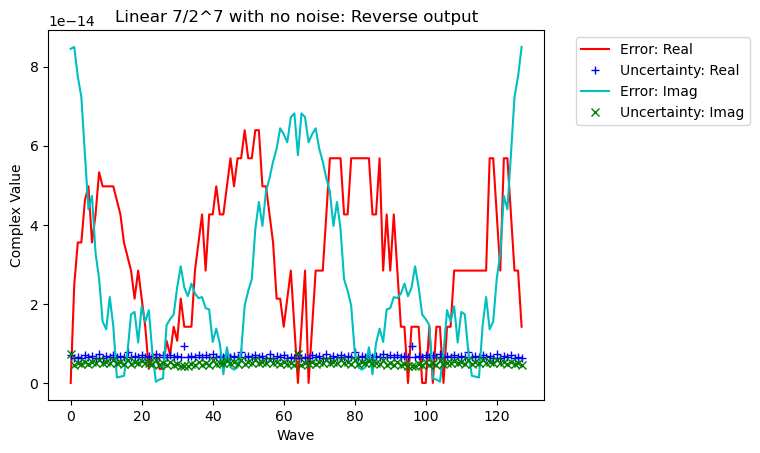

In [91]:
PlotSpec('Gaussian', 0, 'Linear', 7, 7, 'Reverse')